# Разработка сверточной нейронной сети

<u>Цель:</u> получить базовые навыки работы с одной из библиотек глубокого
обучения (Caffe, Torch, TensorFlow или MXNet на выбор) на примере
сверточных нейронных сетей

Для выполнения данной работы мной была выбрана библиотека TensorFlow.

Данная работа состоит из частей.
1. <u>Загрузка библиотек </u> В данной части были загружены, а в случае необходмости, установлены необходмые библиотеки. Также зафиксированы рандомные значения, а также технические функции.  
2. <u>Проверка на даных mnist </u> В данной части были закружены данные mnist, создана нейронная сеть соответвующая логистической рересии, проверена работа сети на данных mnist.
3. <u>Подготовка данных </u> Предварительный просмотр данных, их колличества и содержания. Загрузка данных, создание датесета и загрузчика данных. Разработка программ/скриптов для подготовки тренировочных и тестовых данных.
4. <u>Разработка и обучение нейронных сетей</u> Разработаны 4 архитектуры нейроных сетей.

<u>Вывод</u>

## Часть 1. Загрузка необходмых библиотек

In [4]:
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense,\
                                    Flatten,\
                                    Conv2D,\
                                    MaxPooling2D,\
                                    LeakyReLU,\
                                    Input,\
                                    GlobalAveragePooling2D,\
                                    BatchNormalization,\
                                    Dropout,\
                                    Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model


In [13]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
def plot_training_history(history):
    """
    Строит графики ошибки и точности на тренировочных и тестовых данных.
    """
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Train accuracy')
    plt.plot(epochs, val_acc, 'r', label='Test accuracy')
    plt.title('Train and Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Train loss')
    plt.plot(epochs, val_loss, 'r', label='Test loss')
    plt.title('Train and Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

## Часть 2. Проверка на данных mnist

In [9]:
# Загрузка данных
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Количество обучающих изображений: 60000
Количество тестовых изображений: 10000


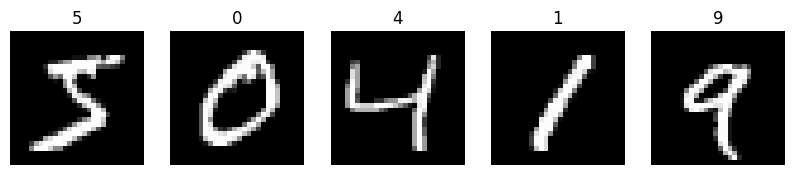

In [11]:
# посмотрим, что там загрузилось
print(f'Количество обучающих изображений: {X_train.shape[0]}')
print(f'Количество тестовых изображений: {X_test.shape[0]}')

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')

In [12]:
# Предобработка данных
X_train = X_train.reshape((X_train.shape[0], 28 * 28)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28)).astype('float32') / 255
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Создание модели
model = models.Sequential()
model.add(layers.Input(shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Обучение модели
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Оценка модели
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Accuracy: {test_acc * 100:.2f}%')

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8199 - loss: 0.7088 - val_accuracy: 0.9161 - val_loss: 0.3070
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9139 - loss: 0.3065 - val_accuracy: 0.9227 - val_loss: 0.2798
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9215 - loss: 0.2815 - val_accuracy: 0.9236 - val_loss: 0.2725
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9239 - loss: 0.2716 - val_accuracy: 0.9262 - val_loss: 0.2684
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9240 - loss: 0.2666 - val_accuracy: 0.9279 - val_loss: 0.2642
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9271 - loss: 0.2592 - val_accuracy: 0.9260 - val_loss: 0.2645
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9283 - loss: 0.2647 - val_accuracy: 0.9265 - val_loss: 0.2643
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9301 - loss: 0.2553 - 

Хорошая метрика для одного линейного слоя модели, перейдем к основным данным.

## Часть 3. Подготовка данных.

 Были использованы данные с kaggle https://www.kaggle.com/datasets/alessiocorrado99/animals10/data

In [2]:
import zipfile
import os

zip_file_path = '/content/animals (1).zip'
extract_to_folder = '/content/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_folder)

Посмотрим на размеры загруженных изображений. Изображения находятся в 10 папках, название папки - класс изображения.

In [29]:
file_path = "/content/raw-img"

image_files = []

for class_name in os.listdir(file_path):
    class_dir = os.path.join(file_path, class_name)
    if os.path.isdir(class_dir):
        for img_file in os.listdir(class_dir):
            if img_file.endswith(('.png', '.jpg', '.jpeg')):
                image_files.append(os.path.join(class_dir, img_file))

def get_image_size(image_path):
    with Image.open(image_path) as img:
        return img.size

sizes = []

for image_path in image_files:
    size = get_image_size(image_path)
    sizes.append(size)

sizes_array = np.array(sizes)
min_size = np.min(sizes_array, axis=0)
max_size = np.max(sizes_array, axis=0)
avg_size = np.mean(sizes_array, axis=0)

print(f"Минимальный размер изображения: {min_size[0]}x{min_size[1]}")
print(f"Максимальный размер изображения: {max_size[0]}x{max_size[1]}")
print(f"Средний размер изображения: {avg_size[0]:.2f}x{avg_size[1]:.2f}")

Минимальный размер изображения: 60x57
Максимальный размер изображения: 6720x6000
Средний размер изображения: 320.04x252.63


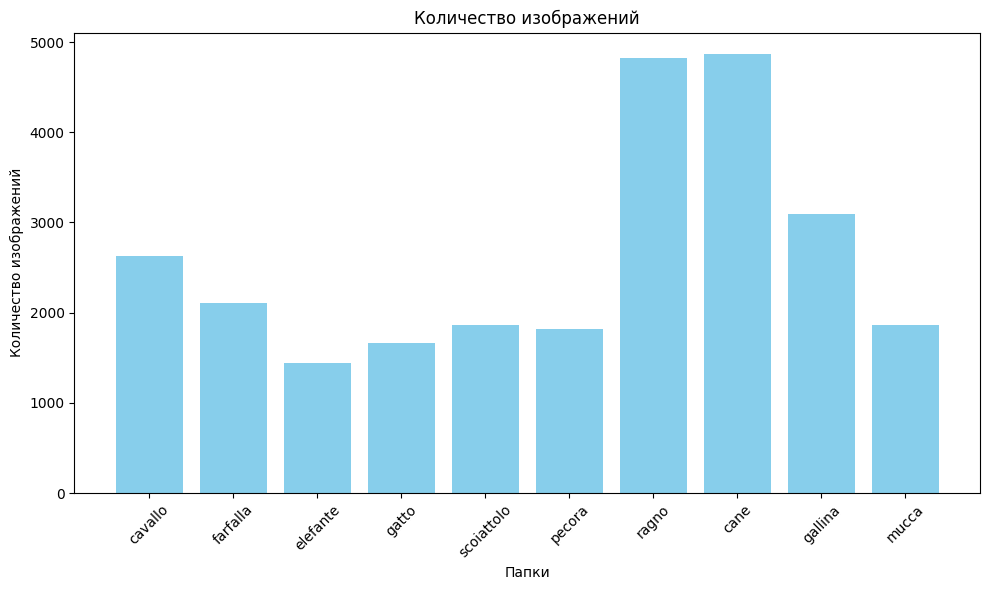

In [7]:
root_dir = '/content/raw-img'
folder_counts = {}

for folder in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder)
    if os.path.isdir(folder_path):
        image_count = len([f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))])
        folder_counts[folder] = image_count

df = pd.DataFrame(list(folder_counts.items()), columns=['Folder', 'Image Count'])

plt.figure(figsize=(10, 6))
plt.bar(df['Folder'], df['Image Count'], color='skyblue')
plt.xlabel('Папки')
plt.ylabel('Количество изображений')
plt.title('Количество изображений')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

В выборке разные по размеру изображения. Для уменьшения потери данных можно свести все изобраения к размеру, близкому к среднему.  Также количетсво изображений разное. Это может сказаться на работу полученной модели. Но в данном проекте из-за ограничения мощностей и времени обучения уравнивать классы не будем.

Далее изпользуем генераторы для загрузки данных.

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

file_path = "/content/raw-img"

train_data = train_datagen.flow_from_directory(
    file_path,
    target_size=(320, 250),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

test_data = test_datagen.flow_from_directory(
    file_path,
    target_size=(320, 250),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


Посмотрим на изображения

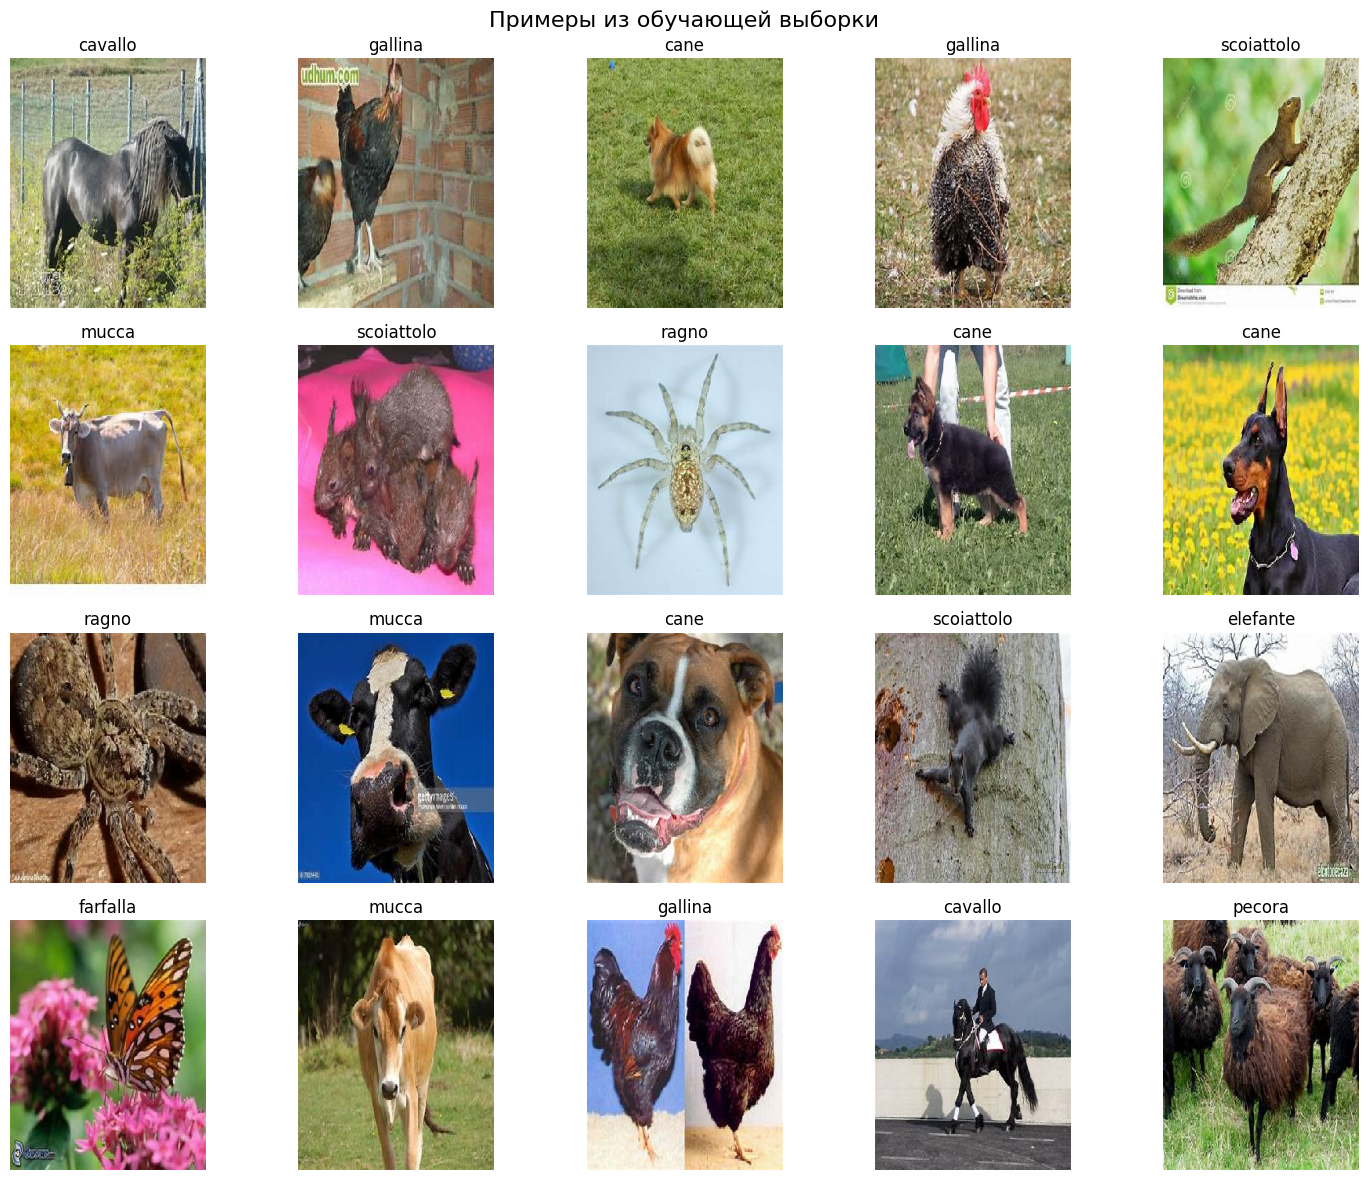

In [7]:
images, labels = next(train_data)

class_indices = {v: k for k, v in train_data.class_indices.items()}
label_names = [class_indices[np.argmax(label)] for label in labels]

fig, axes = plt.subplots(4, 5, figsize=(15, 12))
fig.suptitle("Примеры из обучающей выборки", fontsize=16)

for i, ax in enumerate(axes.flat):
    if i < len(images):
        ax.imshow(images[i])
        ax.set_title(label_names[i])
        ax.axis("off")

plt.tight_layout()
plt.show()

## Часть 4. Разработка архитектур нейронных сетей и обучение их.

In [7]:
# Устройство для обучения
device = tf.config.list_physical_devices('GPU')
if device:
    print("Using GPU for training")
else:
    print("Using CPU for training")

Using GPU for training


In [8]:
# Параметры задачи
input_shape = (320, 250, 3)
num_classes = 10

Для начала проверим работу полносвязанной нейронной сети. Используем 4х слойную сеть (3 скрытых слоя)

In [7]:
def model_base(input_shape, num_classes):
    model = Sequential([
        Input(shape=input_shape),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(64, activation='tanh'),
        Dense(32, activation='sigmoid'),
        Dense(num_classes, activation='softmax')
    ])
    return model

model_0 = model_base(input_shape, num_classes)

model_0.compile(optimizer=Adam(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 240000)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      30,720,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,730,794 (117.23 MB)

 Trainable params: 30,730,794 (117.23 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
%%time
# Обучение модели
history = model_0.fit(
    train_data,
    validation_data=test_data,
    epochs=10,
    steps_per_epoch=len(train_data),
    validation_steps=len(test_data)
)

Epoch 1/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 72s 109ms/step - accuracy: 0.1844 - loss: 2.2117 - val_accuracy: 0.1843 - val_loss: 2.2119
Epoch 2/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 66s 101ms/step - accuracy: 0.1888 - loss: 2.2068 - val_accuracy: 0.1843 - val_loss: 2.2096
Epoch 3/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 77s 93ms/step - accuracy: 0.1881 - loss: 2.2114 - val_accuracy: 0.1858 - val_loss: 2.2094
Epoch 4/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 78s 87ms/step - accuracy: 0.1865 - loss: 2.2119 - val_accuracy: 0.1858 - val_loss: 2.2121
Epoch 5/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.1875 - loss: 2.2085 - val_accuracy: 0.1843 - val_loss: 2.2097
Epoch 6/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 58s 89ms/step - accuracy: 0.1815 - loss: 2.2110 - val_accuracy: 0.1843 - val_loss: 2.2083
Epoch 7/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 59s 91ms/step - accuracy: 0.1839 - loss: 2.2074 - val_accuracy: 0.1858 - val_loss: 2.2083
Epoch 8/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 58s 89ms/step - accuracy: 0.1875 - loss: 2.2089 

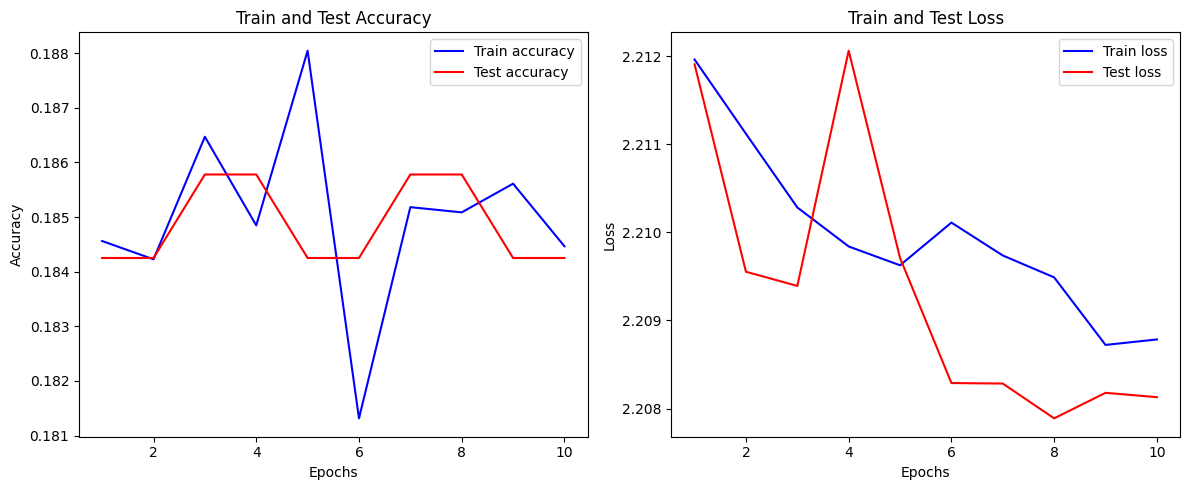

In [11]:
plot_training_history(history)

Несмотря на то, что  ошибка и на трайне и тесте ощибается, мптрика стоит на месте. Также сама по себе метрика на уровне 0.18 больше похожа на случайное  или одинаковое назначение классов. Полностью связанные нейронные сети при работе с изображениями незаменимы на финальных этапах, но если использовать только их, то теряются взаимосвязи между слоями изображений и модели показывают плохой результат.  

Заменим два первых слоя на свертку и слой пулинга.

In [12]:
def model_cnn_2(input_shape, num_classes):
    model = Sequential([
        Input(shape=input_shape),
        Conv2D(32, (3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation="relu"),
        Dense(num_classes, activation="softmax")
    ])
    return model

model_1 = model_cnn_2(input_shape, num_classes)

model_1.compile(optimizer=Adam(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 318, 248, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 159, 124, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 157, 122, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 78, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 304512)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      38,977,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,998,346 (148.77 MB)

 Trainable params: 38,998,346 (148.77 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
%%time
# Обучение модели
history = model_1.fit(
    train_data,
    validation_data=test_data,
    epochs=10,
    steps_per_epoch=len(train_data),
    validation_steps=len(test_data)
)

Epoch 1/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 88s 124ms/step - accuracy: 0.3133 - loss: 2.5606 - val_accuracy: 0.5004 - val_loss: 1.4510
Epoch 2/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 67s 103ms/step - accuracy: 0.6363 - loss: 1.1053 - val_accuracy: 0.5648 - val_loss: 1.3437
Epoch 3/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 83s 105ms/step - accuracy: 0.8640 - loss: 0.4361 - val_accuracy: 0.5682 - val_loss: 1.6320
Epoch 4/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 66s 101ms/step - accuracy: 0.9658 - loss: 0.1256 - val_accuracy: 0.5510 - val_loss: 2.3836
Epoch 5/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 65s 99ms/step - accuracy: 0.9815 - loss: 0.0700 - val_accuracy: 0.5495 - val_loss: 2.7419
Epoch 6/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 87s 107ms/step - accuracy: 0.9888 - loss: 0.0477 - val_accuracy: 0.5346 - val_loss: 3.0201
Epoch 7/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 77s 98ms/step - accuracy: 0.9920 - loss: 0.0325 - val_accuracy: 0.5388 - val_loss: 3.2434
Epoch 8/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - accuracy: 0.9929 - loss: 0.02

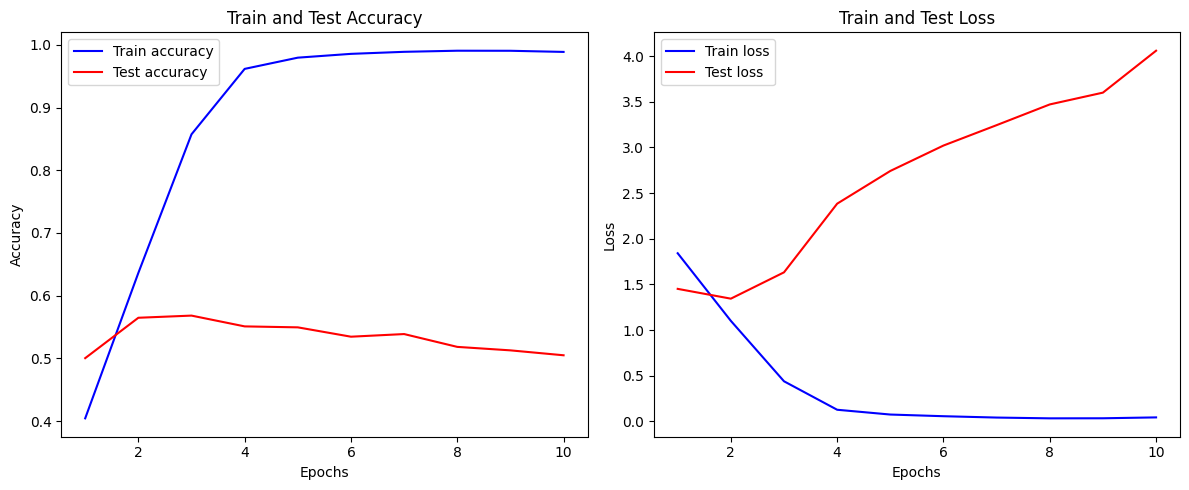

In [14]:
plot_training_history(history)

Уже после первой эпохи модель показывает результат лучше, что полносвязная сеть. Однако, уже после второй эпохи видно переобучение. После 4 эпохи модель полностью подстроилась под тренировочные данные.

Добавим еще один слой свертки. Для удобства выделим отдельно сверточный блок. Также для предотвращения переобучения добавии обнуление нейронов(Dropout) и нормализацию данных.

In [29]:
# сверточный блок
def conv_block(x, filters, kernel_size, pool_size):
    x = Conv2D(filters, kernel_size)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(0.1)(x)
    x = MaxPooling2D(pool_size=pool_size)(x)
    x = Dropout(0.2)(x)
    return x

In [30]:
def model_cnn_3(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    x = conv_block(inputs, 32, (3, 3), (2, 2))
    x = conv_block(x, 64, (3, 3), (2, 2))
    x = conv_block(x, 128, (3, 3), (2, 2))

    x = Flatten()(x)
    x = Dense(256)(x)
    x = Dropout(0.2)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(0.1)(x)
    outputs = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

model_2 = model_cnn_3(input_shape, num_classes)

model_2.compile(optimizer=Adam(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model_2.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 320, 250, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 318, 248, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 318, 248, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 318, 248, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 159, 124, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 159, 124, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 157, 122, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 157, 122, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 157, 122, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 78, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 78, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 76, 59, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 76, 59, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 76, 59, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 38, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 38, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 141056)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 256)                 │      36,110,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 256)                 │           1,0

 Total params: 36,208,330 (138.12 MB)

 Trainable params: 36,207,370 (138.12 MB)

 Non-trainable params: 960 (3.75 KB)

In [31]:
%%time
# Обучение модели
history = model_2.fit(
    train_data,
    validation_data=test_data,
    epochs=10,
    steps_per_epoch=len(train_data),
    validation_steps=len(test_data)
)

Epoch 1/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 95s 132ms/step - accuracy: 0.3788 - loss: 1.8394 - val_accuracy: 0.5078 - val_loss: 1.4618
Epoch 2/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 80s 122ms/step - accuracy: 0.5894 - loss: 1.1964 - val_accuracy: 0.5466 - val_loss: 1.3318
Epoch 3/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 78s 119ms/step - accuracy: 0.6868 - loss: 0.9343 - val_accuracy: 0.5560 - val_loss: 1.3048
Epoch 4/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 78s 120ms/step - accuracy: 0.7654 - loss: 0.6949 - val_accuracy: 0.5898 - val_loss: 1.3277
Epoch 5/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 77s 118ms/step - accuracy: 0.8481 - loss: 0.4645 - val_accuracy: 0.6028 - val_loss: 1.2446
Epoch 6/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 81s 117ms/step - accuracy: 0.9076 - loss: 0.2958 - val_accuracy: 0.6282 - val_loss: 1.2033
Epoch 7/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 82s 117ms/step - accuracy: 0.9439 - loss: 0.1818 - val_accuracy: 0.5707 - val_loss: 1.8659
Epoch 8/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 82s 117ms/step - accuracy: 0.9556 - loss: 0

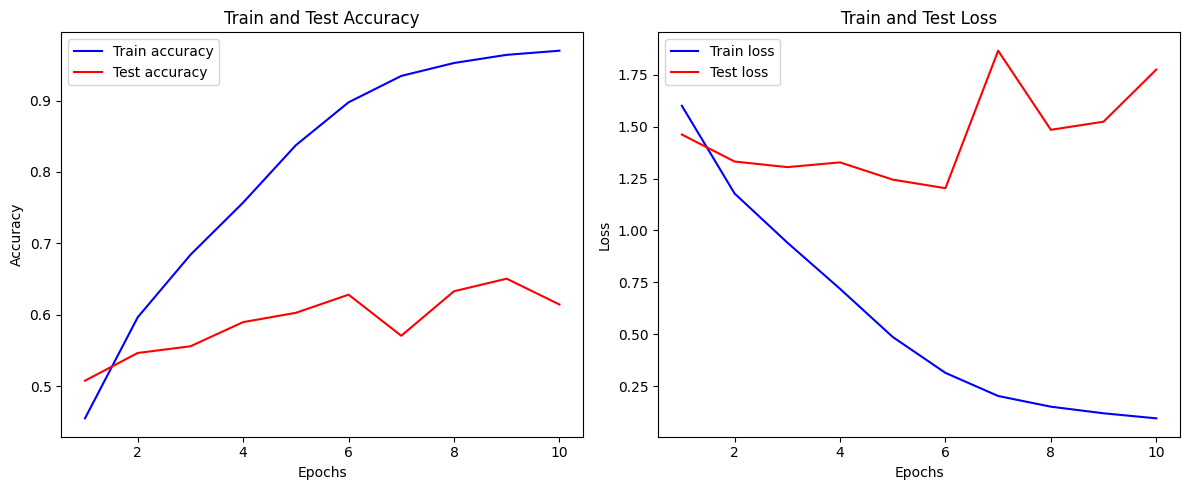

In [32]:
plot_training_history(history)

Модель уже не подсраивается под тренировочные данные, но переобучение созраняется.

Добавим l2 регуляризацию в сверточный слой, добавим GlobalAveragePooling2D перед полносвязными слоями, сделаем разным исключение нейроннов на разных слоях (значение dropout).

In [9]:
# сверточный блок
def conv_block(x, filters, kernel_size, pool_size, dropout_rate=0.5):
    x = Conv2D(filters, kernel_size, kernel_regularizer=l2(0.0005))(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(0.1)(x)
    x = MaxPooling2D(pool_size=pool_size)(x)
    if dropout_rate > 0.0:
        x = Dropout(dropout_rate)(x)
    return x

In [10]:
def model_cnn_4(input_shape, num_classes):
    inputs = Input(shape = input_shape)

    x = conv_block(inputs, 32, (3, 3), (2, 2), dropout_rate=0.3)  # Первый блок (Dropout 20%)
    x = conv_block(x, 64, (3, 3), (2, 2), dropout_rate=0.4)      # Второй блок (Dropout 30%)
    x = conv_block(x, 128, (3, 3), (2, 2), dropout_rate=0.4)     # Третий блок (Dropout 40%)
    x = conv_block(x, 128, (3, 3), (2, 2), dropout_rate=0.5)

    x = GlobalAveragePooling2D()(x)

    x = Dense(64, kernel_regularizer=l2(0.0005))(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(0.1)(x)
    x = Dropout(0.5)(x)

    outputs = Dense(10, activation = "softmax")(x)

    model = Model(inputs = inputs, outputs = outputs)

    return model

model_3 = model_cnn_4(input_shape, num_classes)

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

model_3.compile(optimizer = optimizer,
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model_3.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 320, 250, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 318, 248, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 318, 248, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 318, 248, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 159, 124, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 159, 124, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 157, 122, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 157, 122, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 157, 122, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 78, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 78, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 76, 59, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 76, 59, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 76, 59, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 38, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 38, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 36, 27, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 36, 27, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 36, 27, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 251,402 (982.04 KB)

 Trainable params: 250,570 (978.79 KB)

 Non-trainable params: 832 (3.25 KB)

In [62]:
%%time
# Обучение модели
history = model_3.fit(
    train_data,
    validation_data=test_data,
    epochs=10,
    steps_per_epoch=len(train_data),
    validation_steps=len(test_data)
)

Epoch 1/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 97s 132ms/step - accuracy: 0.2130 - loss: 2.4635 - val_accuracy: 0.1984 - val_loss: 2.5613 - learning_rate: 0.0010
Epoch 2/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 126s 116ms/step - accuracy: 0.3552 - loss: 1.9527 - val_accuracy: 0.3450 - val_loss: 2.0476 - learning_rate: 0.0010
Epoch 3/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 77s 117ms/step - accuracy: 0.4396 - loss: 1.7475 - val_accuracy: 0.3742 - val_loss: 2.2403 - learning_rate: 0.0010
Epoch 4/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 81s 116ms/step - accuracy: 0.4815 - loss: 1.6336 - val_accuracy: 0.3651 - val_loss: 1.8397 - learning_rate: 0.0010
Epoch 5/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 82s 116ms/step - accuracy: 0.5049 - loss: 1.5614 - val_accuracy: 0.4077 - val_loss: 1.9505 - learning_rate: 0.0010
Epoch 6/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 75s 115ms/step - accuracy: 0.5299 - loss: 1.5155 - val_accuracy: 0.4597 - val_loss: 1.7604 - learning_rate: 0.0010
Epoch 7/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 82s 115ms/step - accuracy: 0.

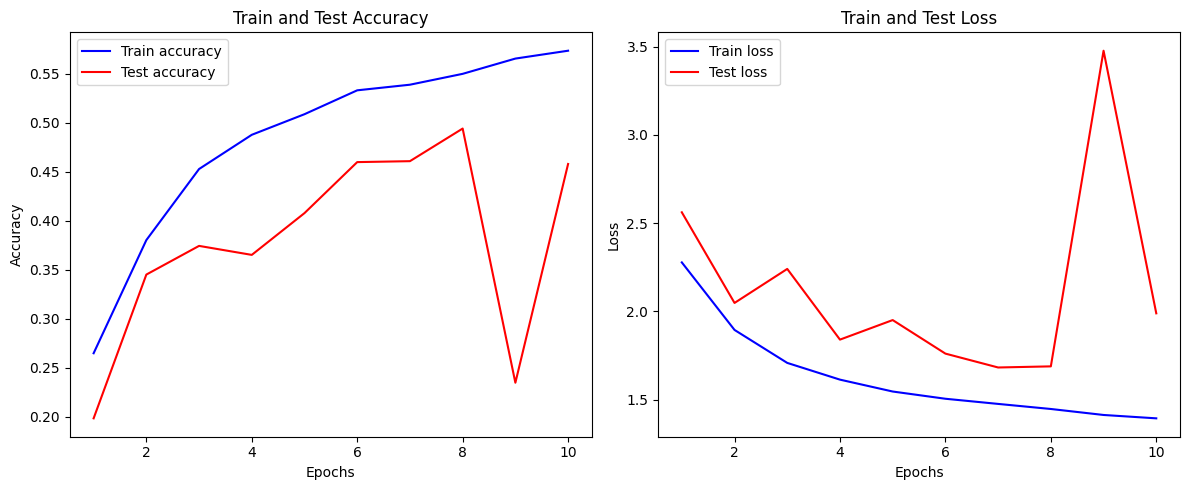

In [63]:
plot_training_history(history)

Из модели видно, что метрики как на обучабщих так и тестовых данных совместо растут, хотя есть и выбросы. Не видно нееобучения, но модель недоучена. Стоит увеличить эпохи обучения модели.

Добавить изменение шага модели к процессу обучения. Это позволит более плавно изменять веса на большом количестве эпох.
Также добавим метод регуляризации - Early Stopping - который должен остановить обучение, если ошибка на валидационных данных не будет уменьшаться.

In [11]:
model_4 = model_cnn_4(input_shape, num_classes)

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

model_4.compile(optimizer = optimizer,
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [14]:
%%time
# Обучение модели
history = model_4.fit(
    train_data,
    validation_data=test_data,
    epochs=50,
    steps_per_epoch=len(train_data),
    validation_steps=len(test_data),
    callbacks=[early_stopping, lr_scheduler]
)

Epoch 1/50
655/655 ━━━━━━━━━━━━━━━━━━━━ 104s 138ms/step - accuracy: 0.2154 - loss: 2.5008 - val_accuracy: 0.2282 - val_loss: 2.4363 - learning_rate: 0.0010
Epoch 2/50
655/655 ━━━━━━━━━━━━━━━━━━━━ 114s 114ms/step - accuracy: 0.3413 - loss: 2.0028 - val_accuracy: 0.2993 - val_loss: 2.1265 - learning_rate: 0.0010
Epoch 3/50
655/655 ━━━━━━━━━━━━━━━━━━━━ 82s 114ms/step - accuracy: 0.4132 - loss: 1.7866 - val_accuracy: 0.3664 - val_loss: 2.2880 - learning_rate: 0.0010
Epoch 4/50
655/655 ━━━━━━━━━━━━━━━━━━━━ 76s 115ms/step - accuracy: 0.4637 - loss: 1.6699 - val_accuracy: 0.4675 - val_loss: 1.6075 - learning_rate: 0.0010
Epoch 5/50
655/655 ━━━━━━━━━━━━━━━━━━━━ 81s 114ms/step - accuracy: 0.4903 - loss: 1.5815 - val_accuracy: 0.2127 - val_loss: 3.4950 - learning_rate: 0.0010
Epoch 6/50
655/655 ━━━━━━━━━━━━━━━━━━━━ 74s 113ms/step - accuracy: 0.5225 - loss: 1.5140 - val_accuracy: 0.2917 - val_loss: 2.9830 - learning_rate: 0.0010
Epoch 7/50
655/655 ━━━━━━━━━━━━━━━━━━━━ 83s 114ms/step - accuracy: 0

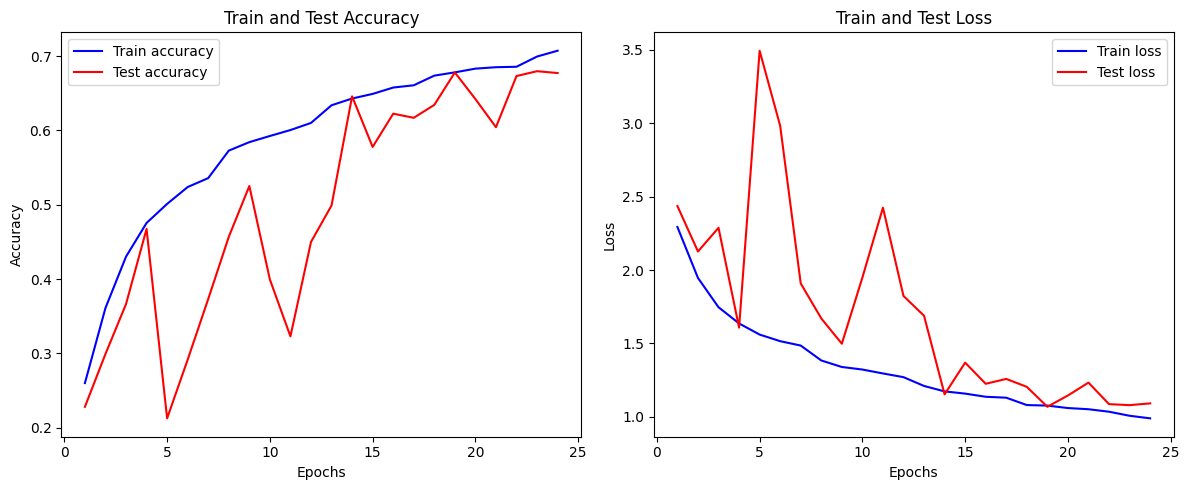

In [15]:
plot_training_history(history)

Модель остановилась после 24 эпохи на метрике accuracy 0.67. В отличие от предыдущих моделей, ошибка и метрика на тестовой и тренировочный выборке повышаются равномерно. Попробуем убрать регуляризацию эпох и обучим модель на большом количестве эпох.

In [16]:
model_5 = model_cnn_4(input_shape, num_classes)

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

model_5.compile(optimizer = optimizer,
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [17]:
%%time
# Обучение модели
history = model_5.fit(
    train_data,
    validation_data=test_data,
    epochs=50,
    steps_per_epoch=len(train_data),
    validation_steps=len(test_data),
    callbacks=[lr_scheduler]
)

Epoch 1/50
655/655 ━━━━━━━━━━━━━━━━━━━━ 94s 126ms/step - accuracy: 0.2220 - loss: 2.4443 - val_accuracy: 0.2703 - val_loss: 2.1323 - learning_rate: 0.0010
Epoch 2/50
655/655 ━━━━━━━━━━━━━━━━━━━━ 126s 112ms/step - accuracy: 0.3613 - loss: 1.9480 - val_accuracy: 0.2057 - val_loss: 2.4474 - learning_rate: 0.0010
Epoch 3/50
655/655 ━━━━━━━━━━━━━━━━━━━━ 82s 113ms/step - accuracy: 0.4335 - loss: 1.7524 - val_accuracy: 0.3108 - val_loss: 2.1131 - learning_rate: 0.0010
Epoch 4/50
655/655 ━━━━━━━━━━━━━━━━━━━━ 84s 117ms/step - accuracy: 0.4739 - loss: 1.6488 - val_accuracy: 0.3958 - val_loss: 1.7491 - learning_rate: 0.0010
Epoch 5/50
655/655 ━━━━━━━━━━━━━━━━━━━━ 75s 114ms/step - accuracy: 0.5021 - loss: 1.5771 - val_accuracy: 0.2930 - val_loss: 2.6554 - learning_rate: 0.0010
Epoch 6/50
655/655 ━━━━━━━━━━━━━━━━━━━━ 77s 117ms/step - accuracy: 0.5152 - loss: 1.5387 - val_accuracy: 0.3750 - val_loss: 1.9664 - learning_rate: 0.0010
Epoch 7/50
655/655 ━━━━━━━━━━━━━━━━━━━━ 80s 114ms/step - accuracy: 0.

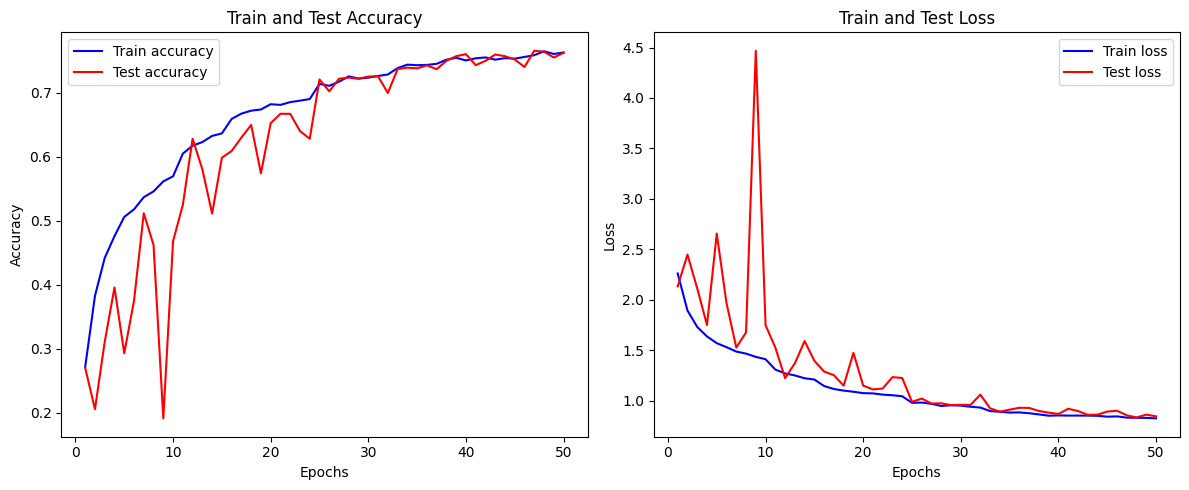

In [18]:
plot_training_history(history)

Метрика продолжает расти, хоть и рост замедлился после 35 эпохи. Метрики на валидационных и тренировочных данных растут одинаково, что показывает на отсутвие переобучения. Модель за 50 эпох обучилась на метрику accuracy 0.76. Построим матрицу ошибок, чтобы посмореть подробнее.

164/164 ━━━━━━━━━━━━━━━━━━━━ 16s 96ms/step


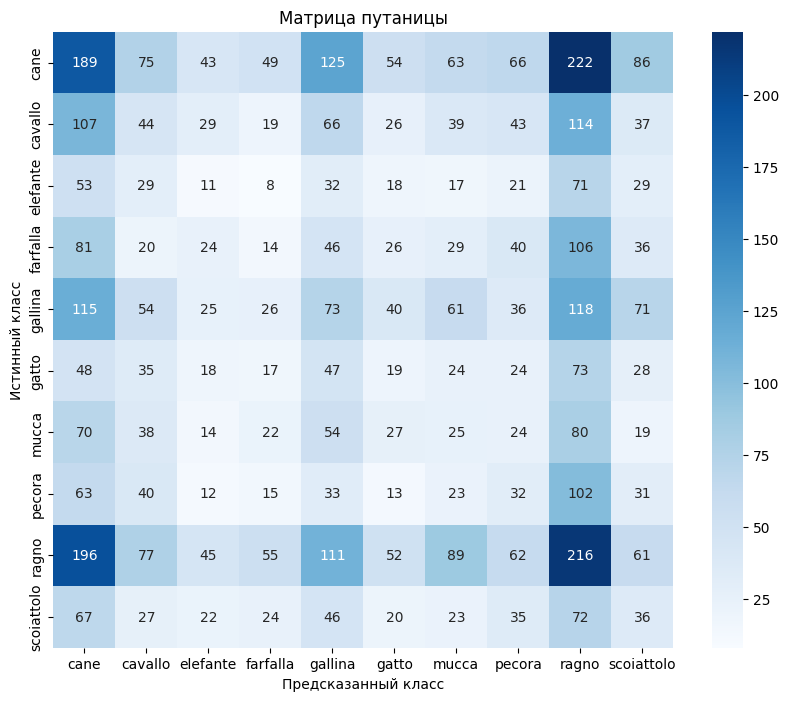

In [21]:
predictions = model_5.predict(test_data, steps=len(test_data))
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data.classes
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_data.class_indices.keys(),
            yticklabels=test_data.class_indices.keys())
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица путаницы')
plt.show()

А вот матица ошибок показываи переобучение. Модель подстраивается под мажорные классы.

## Вывод

В данной работе была разработана модель для многоклассовой классификации изображений.

В процессе работы было создано четре нейронных сети. Первая - полносвязная сеть,а далее постепенно были добавлены сверточные слои, нормализация, регуляризация. Удалось добиться того, что по значения ошибки и метрики на третиновочной и тестовой выборке были примерно одинаковые, что показывает отсувие "подстройки" нейронной сети к тренировочным данным. Максимальная полученная метрика accuracy на валидационных данных - 0.76. Однако, в связи с тем, что выборка изоражений изначально неравномерная, модель начала подстраиваться к мажорным (многочисленным) классам.

Данная модель может быть улучшщена путем аугментации данных, увеличения тренировочной выбоорки, а также уранивания классов в тренировной выборки.